# Preprocessing

In this lab, we will be exploring how to preprocess tweets for sentiment analysis. We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lecture, you will see how to use the [NLTK](http://www.nltk.org) package to perform a preprocessing pipeline for Twitter datasets.

## Setup

You will be doing sentiment analysis on tweets in the first two weeks of this course. To help with that, we will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data, and you will be acquainted with them as we move along the course.

For this exercise, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     Saudi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. 

You can download the dataset in your workspace (or in your local computer) by doing:

In [7]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\python\python39\python.exe -m pip install --upgrade pip' command.


In [47]:
# downloads sample twitter dataset.
from pathlib import Path

import pyarrow.parquet as pq

data = pq.read_table('psoriasis_all_posts.parquet').to_pandas()

In [48]:
data = data[['text', 'forum_id']]
data.reset_index(drop=True, inplace=True)
data

,text,forum_id
0,zunehmend oft höre ich über die problematik d...,4-community
1,"Hallo Annamaria, herzlich Willkommen hier im...",4-community
2,"hallo, Annamaria - ich wünsche dir wirklich ...",4-community
3,Auch ich wünsche euch ein schönes und glückli...,1-allgemeines
4,Ich wünsche Allen Frohes Neues Jahr GB Pics...,1-allgemeines
...,...,...
55883,vor 1 Stunde schrieb Clau dia: Übrigens. I...,4-community
55884,Unser Sommertreffen rückt näher. Wer es im Ka...,4-community
55885,"Hallo und Euch einen schönen Sonntag, da ich...",1-allgemeines
55886,"hallo, BlackFlag - ich musste erst einmal im...",1-allgemeines


In [49]:
data['forum_id'].unique(), data['forum_id'].nunique()

(array(['4-community', '1-allgemeines', '2-behandlung',
        '3-klinik-reha-kur-urlaub'], dtype=object),
 4)

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [50]:
pd.isnull(data['forum_id']).sum()

0

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [51]:
data['text'].apply(lambda x: len(x.split(' '))).sum()

7137730

We have more than 7 million words in the data.

Distribution of classes.

C:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forum_id', ylabel='count'>

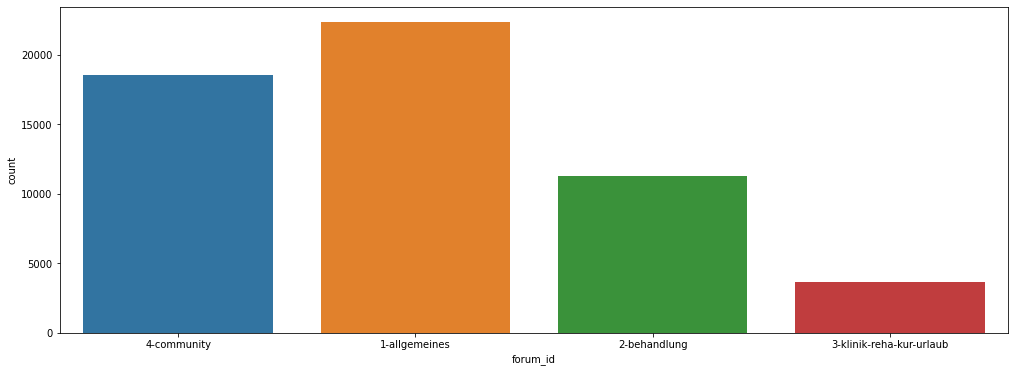

In [52]:
plt.figure(figsize=(17,6))
sns.countplot(data['forum_id'])

##  From the above visualisation we can see classes are not very well balanced.

In [53]:
def post_f_id(index):
    post = data[data.index==index].values[0]
    print(post[0])
    print('forum_id:', post[1])

Looking few posts and tags.

In [54]:
post_f_id(5)

 Guck dir den Guy bloss an, dem trau ich alles zu,   Na na Junge Frau  was soll das denn heissen:altes-lachen:überlegen::zwinker-alt:  glg  Guy:p:p              Quote      
forum_id: 1-allgemeines


In [55]:
post_f_id(11)

 Hallo ihr Lieben,  klar mag ich Märchen und deshalb hab ich mir die Verfilmungen auch angesehen. Ich fand sie wirklich gut gemacht. Natürlich kenn ich auch die alten Verfilmungen, sowohl die Deutschen als auch die Tschechischen.  Liebe Grüße und ein frohes neues Jahr  Bella                      Quote      
forum_id: 4-community


post_f_id(5)

The texts needs to be cleaned up.

In [61]:
pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=e3900823fe7112830d4b9be6ec93010c17859209c9c4c8decd5da488ea5d8529
  Stored in directory: c:\users\mohammad saudi\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\python\python39\python.exe -m pip install --upgrade pip' command.


In [62]:
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

Let's import a few more libraries for this purpose.

In [66]:
def clean_text(text):
    text = BeautifulSoup(text,'lxml').text
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', " ",text)
    text = re.sub('[^0-9a-z #+_]'," ",text)
    text = ' '.join(word for word in text.split() if word not in set(stopwords.words('english')))
    return text

In [67]:
data['text'] = data['text'].apply(clean_text)

In [68]:
post_f_id(5)


guck dir den guy bloss dem trau ich alles zu na na junge frau soll das denn heissen altes lachen berlegen zwinker alt glg guy p p quote
forum_id: 1-allgemeines


In [69]:
post_f_id(11)

hallo ihr lieben klar mag ich rchen und deshalb hab ich mir die verfilmungen auch angesehen ich fand sie wirklich gut gemacht nat rlich kenn ich auch die alten verfilmungen sowohl die deutschen als auch die tschechischen liebe gr e und ein frohes neues jahr bella quote
forum_id: 4-community


In [72]:
data['text'].apply(lambda x: len(x.split(" "))).sum()

5757205

Now, we have over 5 million words to work with.

Splitting the dataset.

In [70]:
from sklearn.model_selection import train_test_split

In [73]:
X = data['text']
y = data['forum_id']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [75]:
X_train.shape

(44710,)

In [76]:
X_test.shape

(11178,)

In [77]:
X_test.head()

41490    hallo jp vielleicht braucht steffi moralisch g...
24690    also dieses tapen hat mir eine heilpraktikerin...
32494    hallo skyla ich sag auch hallo ich bin wie du ...
50184    hallo jasminka lies dir doch mal diesen link d...
8757     hey ja bluttupfen hab ich zum gl ck noch keine...
Name: text, dtype: object

The next steps includes feature engineering and model building using pipeline.

## Naive Bayes classifier for multinomial models

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [79]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [81]:
y_pred = nb.predict(X_test)

In [82]:
print(confusion_matrix(y_pred,y_test))

[[4214 2090  640 2200]
 [   7   80    0    3]
 [   0    0    0    0]
 [ 222  138  135 1449]]


In [83]:
print(classification_report(y_pred, y_test,target_names=data['forum_id'].unique()))
print(accuracy_score(y_pred,y_test))


                          precision    recall  f1-score   support

             4-community       0.95      0.46      0.62      9144
           1-allgemeines       0.03      0.89      0.07        90
            2-behandlung       0.00      0.00      0.00         0
3-klinik-reha-kur-urlaub       0.40      0.75      0.52      1944

                accuracy                           0.51     11178
               macro avg       0.34      0.52      0.30     11178
            weighted avg       0.85      0.51      0.60     11178

0.5137770620862409


C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear support vector machine.

In [84]:
from sklearn.linear_model import SGDClassifier

In [85]:
svm = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('svm_clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.001,n_jobs=-1,random_state=0,max_iter=5))])
svm.fit(X_train,y_train)   

C:\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svm_clf',
                 SGDClassifier(alpha=0.001, max_iter=5, n_jobs=-1,
                               random_state=0))])

In [86]:
%%time
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm, target_names=data['forum_id'].unique()))

0.5807836822329576
                          precision    recall  f1-score   support

             4-community       0.55      0.76      0.64      4443
           1-allgemeines       0.70      0.26      0.38      2308
            2-behandlung       0.75      0.41      0.53       775
3-klinik-reha-kur-urlaub       0.59      0.60      0.59      3652

                accuracy                           0.58     11178
               macro avg       0.65      0.51      0.53     11178
            weighted avg       0.61      0.58      0.56     11178

Wall time: 1.61 s


## Creating bag of words with Keras.

In [87]:
from tensorflow import keras

In [88]:
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import text, sequence

Using TensorFlow backend.

In [89]:
train_size = int(len(data) * 0.7)

In [90]:
print('Train size: %d' %train_size)
print('Test_size: %d' %(len(data)-train_size))

Train size: 39121
Test_size: 16767


In [91]:
train_post = data['text'][:train_size]
train_tag = data['forum_id'][:train_size]
test_post = data['text'][train_size:]
test_tag = data['forum_id'][train_size:]

In [92]:
train_post.head()

0    zunehmend oft h ich ber die problematik der sc...
1    hallo annamaria herzlich willkommen hier im fo...
2    hallo annamaria ich w nsche dir wirklich dauer...
3    auch ich w nsche euch ein sch nes und gl cklic...
4    ich w nsche allen frohes neues jahr gb pics quote
Name: text, dtype: object

In [93]:
train_tag.head()

0      4-community
1      4-community
2      4-community
3    1-allgemeines
4    1-allgemeines
Name: forum_id, dtype: object

In [94]:
test_tag.head()

39121    4-community
39122    4-community
39123    4-community
39124    4-community
39125    4-community
Name: forum_id, dtype: object

In [95]:
token = text.Tokenizer(num_words=1000,char_level=False)

In [96]:
token.fit_on_texts(train_post)

In [97]:
x_train = token.texts_to_matrix(train_post)
x_test = token.texts_to_matrix(test_post)

In [98]:
print(x_train)
print(x_train.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(39121, 1000)


In [99]:
print(x_test)
print(x_test.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(16767, 1000)


In [100]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train = encoder.fit_transform(train_tag)
Y_test = encoder.transform(test_tag)
print(Y_train)
print(Y_train.shape)

[3 3 3 ... 3 3 3]
(39121,)


In [101]:
print(Y_test)
print(Y_test.shape)

[3 3 3 ... 0 0 0]
(16767,)


In [102]:
num_classes = np.max(Y_train) + 1

In [110]:
from tensorflow.keras import utils as np_utils


Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [111]:
print(Y_test)
print(Y_test.shape)
print(Y_train)
print(Y_train.shape)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
(16767, 4)
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
(39121, 4)


In [112]:
model = Sequential()
model.add(Dense(512, input_shape=(1000,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [113]:
%%time
model.fit(x_train,Y_train, batch_size=32, epochs=2)

Epoch 1/2
1223/1223 [==============================] - 18s 13ms/step - loss: 1.0593 - accuracy: 0.5232
Epoch 2/2
1223/1223 [==============================] - 15s 12ms/step - loss: 0.9401 - accuracy: 0.5880
Wall time: 44.6 s


In [114]:
score = model.evaluate(x_test, Y_test,
                       batch_size=32, verbose=1)
print('Test accuracy:', score[1])

524/524 [==============================] - 3s 5ms/step - loss: 1.0514 - accuracy: 0.5336
Test accuracy: 0.5336076617240906


## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('rfc', RandomForestClassifier(n_estimators=200, criterion='entropy'))])
rfc.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('rfc',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=200))])

In [116]:
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_pred_rfc,y_test))
print(classification_report(y_pred_rfc,y_test))

0.5468777956700662
                          precision    recall  f1-score   support

           1-allgemeines       0.85      0.49      0.62      7617
            2-behandlung       0.11      0.80      0.20       333
3-klinik-reha-kur-urlaub       0.19      0.89      0.32       168
             4-community       0.53      0.63      0.58      3060

                accuracy                           0.55     11178
               macro avg       0.42      0.70      0.43     11178
            weighted avg       0.73      0.55      0.59     11178



## Logistic regression.

In [117]:
from sklearn.linear_model import LogisticRegression
lr = Pipeline([('vect',CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('lr_clf', LogisticRegression(n_jobs=-1,C=0.01))])
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print(accuracy_score(y_pred_lr,y_test))
print(classification_report(y_pred_lr,y_test,target_names= data['forum_id'].unique()))

0.4825550187869028


C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

             4-community       0.90      0.45      0.60      8930
           1-allgemeines       0.00      0.00      0.00         0
            2-behandlung       0.00      0.00      0.00         0
3-klinik-reha-kur-urlaub       0.38      0.62      0.48      2248

                accuracy                           0.48     11178
               macro avg       0.32      0.27      0.27     11178
            weighted avg       0.80      0.48      0.57     11178

